In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
df=pd.read_csv("supermarket.csv")

In [2]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 17 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Invoice ID               1000 non-null   object 
 1   Branch                   1000 non-null   object 
 2   City                     1000 non-null   object 
 3   Customer type            1000 non-null   object 
 4   Gender                   1000 non-null   object 
 5   Product line             1000 non-null   object 
 6   Unit price               1000 non-null   float64
 7   Quantity                 1000 non-null   int64  
 8   Tax 5%                   1000 non-null   float64
 9   Total                    1000 non-null   float64
 10  Date                     1000 non-null   object 
 11  Time                     1000 non-null   object 
 12  Payment                  1000 non-null   object 
 13  cogs                     1000 non-null   float64
 14  gross margin percentage  

In [3]:
df.isnull().sum()

Invoice ID                 0
Branch                     0
City                       0
Customer type              0
Gender                     0
Product line               0
Unit price                 0
Quantity                   0
Tax 5%                     0
Total                      0
Date                       0
Time                       0
Payment                    0
cogs                       0
gross margin percentage    0
gross income               0
Rating                     0
dtype: int64

<AxesSubplot:>

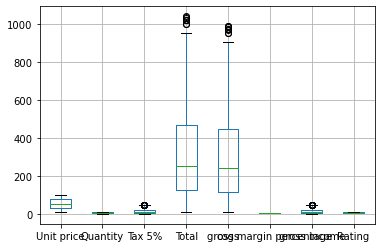

In [4]:
df.boxplot()

In [5]:
Q1 = df.quantile(0.25)
Q3 = df.quantile(0.75)
IQR = Q3 - Q1

df = df[~((df < (Q1 - 1.5 * IQR)) |(df > (Q3 + 1.5 * IQR))).any(axis=1)]

<ipython-input-5-638683b93e01>:5: FutureWarning: Automatic reindexing on DataFrame vs Series comparisons is deprecated and will raise ValueError in a future version.  Do `left, right = left.align(right, axis=1, copy=False)` before e.g. `left == right`
  df = df[~((df < (Q1 - 1.5 * IQR)) |(df > (Q3 + 1.5 * IQR))).any(axis=1)]
<ipython-input-5-638683b93e01>:5: FutureWarning: Automatic reindexing on DataFrame vs Series comparisons is deprecated and will raise ValueError in a future version.  Do `left, right = left.align(right, axis=1, copy=False)` before e.g. `left == right`
  df = df[~((df < (Q1 - 1.5 * IQR)) |(df > (Q3 + 1.5 * IQR))).any(axis=1)]


<AxesSubplot:>

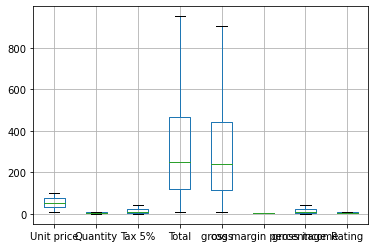

In [6]:
df.boxplot()

In [7]:
df["City"].value_counts()

Yangon       339
Mandalay     330
Naypyitaw    322
Name: City, dtype: int64

In [8]:
df["Customer type"].value_counts()

Member    498
Normal    493
Name: Customer type, dtype: int64

In [9]:
df["Gender"].value_counts()

Male      496
Female    495
Name: Gender, dtype: int64

In [10]:
df["Product line"].value_counts()

Fashion accessories       175
Food and beverages        173
Electronic accessories    170
Sports and travel         165
Home and lifestyle        156
Health and beauty         152
Name: Product line, dtype: int64

In [11]:
df["Payment"].value_counts()

Cash           342
Ewallet        342
Credit card    307
Name: Payment, dtype: int64

In [12]:
df["Branch"].value_counts()

A    339
B    330
C    322
Name: Branch, dtype: int64

<AxesSubplot:xlabel='Branch', ylabel='count'>

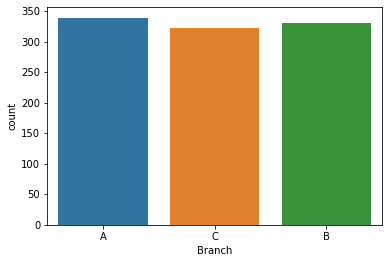

In [13]:
sns.countplot(x="Branch",data=df)

<AxesSubplot:xlabel='Gender', ylabel='count'>

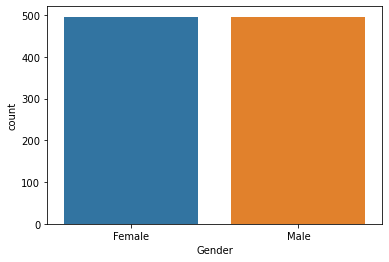

In [14]:
sns.countplot(x="Gender",data=df)

<AxesSubplot:xlabel='Product line', ylabel='count'>

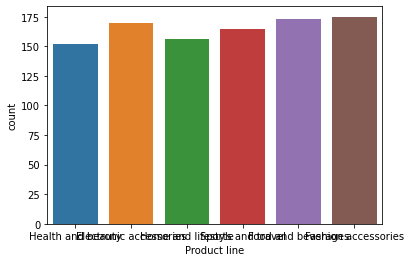

In [15]:
sns.countplot(x="Product line",data=df)

<AxesSubplot:xlabel='Payment', ylabel='count'>

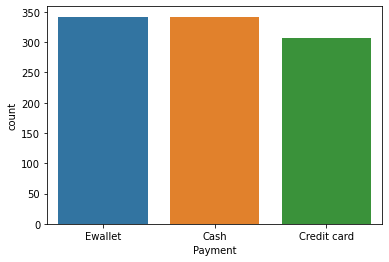

In [16]:
sns.countplot(x="Payment",data=df)

<AxesSubplot:xlabel='Gender', ylabel='count'>

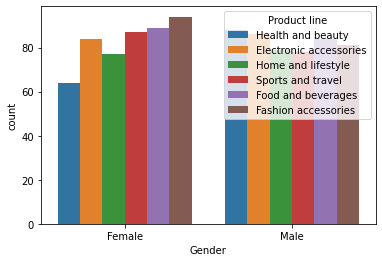

In [22]:
sns.countplot(x="Gender",hue="Product line",data=df)

<AxesSubplot:xlabel='Customer type', ylabel='count'>

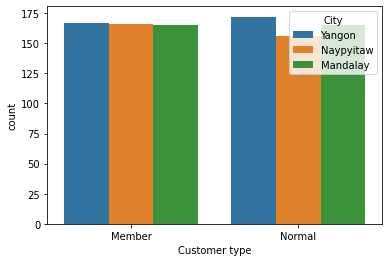

In [23]:
sns.countplot(x="Customer type",hue="City",data=df)

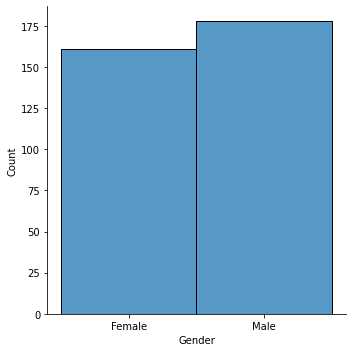

In [21]:
sns.displot(df[df["Branch"]=="A"]["Gender"])

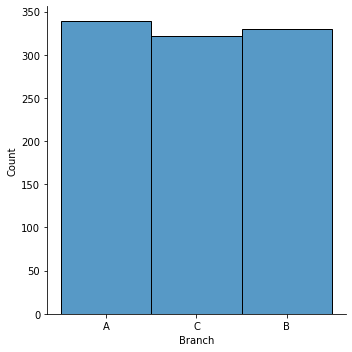

In [20]:
sns.displot(df["Branch"])

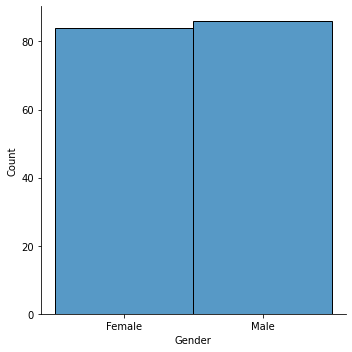

In [24]:
sns.displot(df[df["Product line"]=="Electronic accessories"]["Gender"])

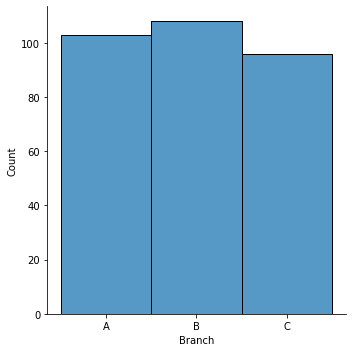

In [25]:
sns.displot(df[df["Payment"]=="Credit card"]["Branch"])

In [26]:
pd.crosstab(df["Gender"],df["Branch"])

Branch,A,B,C
Gender,,,
Female,161,160,174
Male,178,170,148


In [27]:
pd.crosstab(df["City"],df["Customer type"])

Customer type,Member,Normal
City,,
Mandalay,165,165
Naypyitaw,166,156
Yangon,167,172


In [28]:
df.corr()

,Unit price,Quantity,Tax 5%,Total,cogs,gross margin percentage,gross income,Rating
Unit price,1.000000,-0.011506,0.623355,0.623355,0.623355,NaN,0.623355,-0.002527
Quantity,-0.011506,1.000000,0.699290,0.699290,0.699290,NaN,0.699290,-0.009694
Tax 5%,0.623355,0.699290,1.000000,1.000000,1.000000,NaN,1.000000,-0.026092
Total,0.623355,0.699290,1.000000,1.000000,1.000000,NaN,1.000000,-0.026092
cogs,0.623355,0.699290,1.000000,1.000000,1.000000,NaN,1.000000,-0.026092
gross margin percentage,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
gross income,0.623355,0.699290,1.000000,1.000000,1.000000,NaN,1.000000,-0.026092
Rating,-0.002527,-0.009694,-0.026092,-0.026092,-0.026092,NaN,-0.026092,1.000000


<AxesSubplot:>

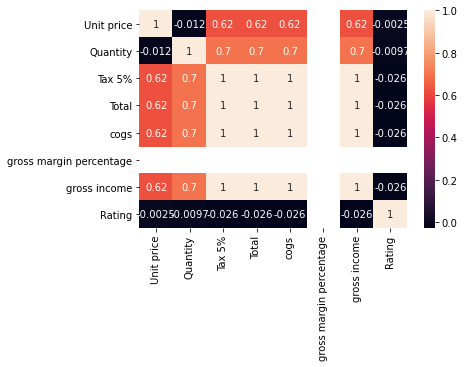

In [29]:
sns.heatmap(df.corr(),annot=True)